# Constructing an ARIMA Model

Udacity course. https://classroom.udacity.com/courses/ud980/

But we're not using Alterys so we're going to get information from: https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

## 1. Understanding the Problem Statement and Dataset
Our data is in a file calld bookings in 'input' directory.
We'll be using this data to forecastthe next six months of room bookings.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from math import sqrt
from sklearn.metrics import mean_squared_error

#Importing data
df = pd.read_csv('input/bookings.csv')

#Dropping some columns
df = df.drop(['Year'], axis= 1)
df = df.drop(['Month'], axis= 1)

#Printing head
df.head()


,Bookings,Date
0,383,01/2006
1,366,02/2006
2,250,03/2006
3,318,04/2006
4,334,05/2006


## 2. Aggregating dataset at monthly basis

In [2]:
#Creating train and test set 
#Index 120 marks. 96 for train and the rest for test
train=df[0:96] 
test=df[96:]

#Aggregating the dataset at daily level
df.Timestamp = pd.to_datetime(df.Date,format='%m/%Y') 
df.index = df.Timestamp 
df = df.resample('M').mean()


train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
Bookings    96 non-null int64
Date        96 non-null object
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


/home/emi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys


In [3]:
train.Timestamp = pd.to_datetime(train.Date,format='%m/%Y') 
train.index = train.Timestamp 
train = train.resample('M').mean() 
test.Timestamp = pd.to_datetime(test.Date,format='%m/%Y') 
test.index = test.Timestamp 
test = test.resample('M').mean()


/home/emi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
/home/emi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


Let’s visualize the data (train and test together) to know how it varies over a time period.

/home/emi/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


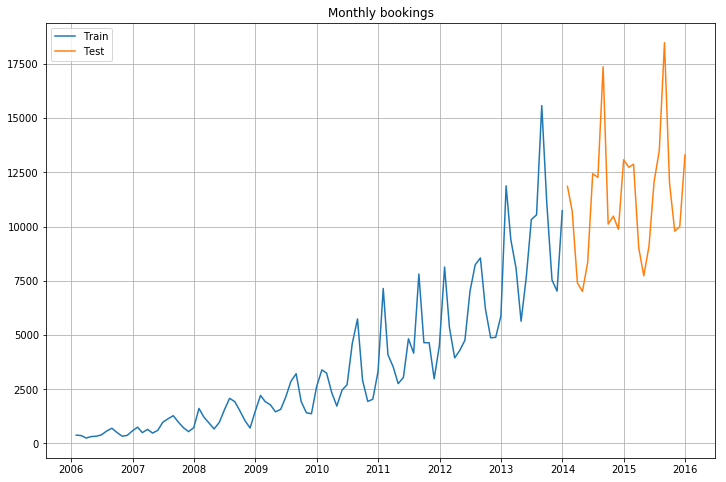

In [4]:
X = train['Bookings'].count
Y = test['Bookings'].count
plt.figure(figsize=(12,8))

plt.plot(train.index, train['Bookings'], label='Train')
plt.plot(test.index,test['Bookings'], label='Test')
plt.legend(loc='best')
plt.title("Monthly bookings")
plt.grid('on')
plt.show()

## 3. Decomposition plot

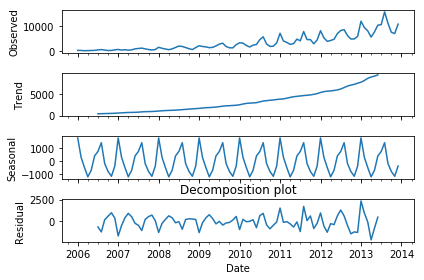

In [5]:
import statsmodels.api as sm

sm.tsa.seasonal_decompose(train['Bookings']).plot()

result = sm.tsa.stattools.adfuller(train['Bookings'])
plt.title('Decomposition plot')
plt.show()

We can see the ascendent Trend 

## 4. Autocorrelation funcion plot (ACF)
A plot of the autocorrelation of a time series by lag is called the AutoCorrelation Function, or the acronym ACF. This plot is sometimes called a correlogram or an autocorrelation plot.

/home/emi/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


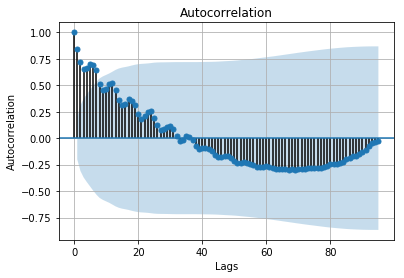

In [7]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(train['Bookings'])
plt.grid("on")
plt.xlabel("Lags")
plt.ylabel("Autocorrelation")
plt.show()

We can see that there is a positive correlation with the first 30-to-22 lags that is perhaps significant for the first 10 lags.

## 5. Partial Autocorrelation Function (ACF)
A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed.

/home/emi/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


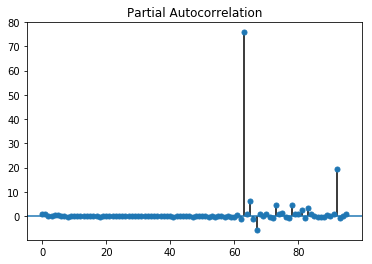

In [8]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(train['Bookings'])

plt.show()

## 6. Creating an ARIMA model

1. Define the model by calling ARIMA() and passing in the p, d, and q parameters.
2. The model is prepared on the training data by calling the fit() function.
3. Predictions can be made by calling the predict() function and specifying the index of the time or times to be predicted.

We will fit an ARIMA model to the entire bookings dataset and review the residual errors.

First, we fit an ARIMA(5,1,0) model. This sets the lag value to 5 for autoregression, uses a difference order of 1 to make the time series stationary, and uses a moving average model of 0.

                             ARIMA Model Results                              
Dep. Variable:             D.Bookings   No. Observations:                  119
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1031.855
Method:                       css-mle   S.D. of innovations           1394.824
Date:                Thu, 26 Jul 2018   AIC                           2077.711
Time:                        21:53:50   BIC                           2097.164
Sample:                    02-28-2006   HQIC                          2085.610
                         - 12-31-2015                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              109.9945     35.585      3.091      0.003      40.248     179.741
ar.L1.D.Bookings    -0.5797      0.088     -6.576      0.000      -0.752      -0.407
ar.L2.D.Bookings    -0.4549 

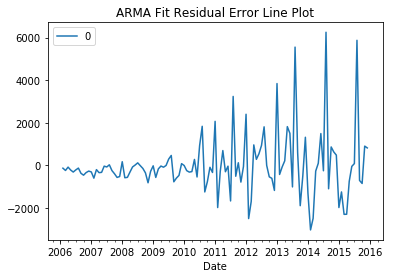

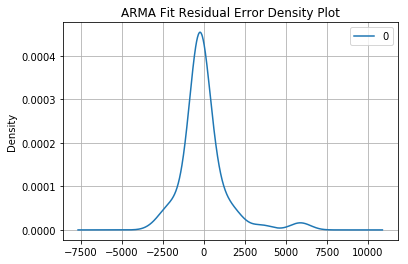

                 0
count   119.000000
mean     -5.088660
std    1400.903260
min   -3025.707838
25%    -549.555190
50%    -214.198744
75%     151.677481
max    6253.854823


In [25]:
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA

# fit model
model = ARIMA(df, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.title("ARMA Fit Residual Error Line Plot")
plt.show()
residuals.plot(kind='kde')
plt.title("ARMA Fit Residual Error Density Plot")
plt.grid("on")
plt.show()
print(residuals.describe())

We can see in the charts that:
1. We get a line plot of the residual errors, suggesting that there may still be some trend information not captured by the model.
2. We get a density plot of the residual error values, suggesting the errors are Gaussian, but may not be centered on zero.
3. The distribution of the residual errors is displayed. The results show that indeed there is a bias in the prediction (a non-zero mean in the residuals).

Note, that although above we used the entire dataset for time series analysis, ideally we would perform this analysis on just the training dataset when developing a predictive model.

Next, let’s look at how we can use the ARIMA model to make forecasts.

Parameters for "order" ARIMA(history, order=(p,d,q)):

* p = (AR) non-seasonal auto regressive component is 0.
* d = (I) degree of first differencing is 1.
* q = (MA) order of the moving average component is 1.

predicted=5769.381440, expected=8553.000000
predicted=5406.908811, expected=6198.000000
predicted=4736.524069, expected=4872.000000
predicted=5420.277381, expected=4892.000000
predicted=6928.258984, expected=5880.000000
predicted=8251.151850, expected=11878.000000
predicted=8004.264704, expected=9398.000000
predicted=7348.921910, expected=8083.000000
predicted=5200.556915, expected=5634.000000
predicted=4716.384579, expected=7675.000000
predicted=9081.058874, expected=10328.000000
predicted=10810.157842, expected=10539.000000
predicted=9859.834497, expected=15578.000000
predicted=9369.177265, expected=11067.000000
predicted=9157.313956, expected=7534.000000
predicted=7958.967242, expected=7023.000000
predicted=8563.496954, expected=10733.000000
predicted=13963.066569, expected=11853.000000
predicted=13427.159640, expected=10716.000000
predicted=10169.241922, expected=7405.000000
predicted=7466.509024, expected=7009.000000
predicted=8863.917967, expected=8340.000000
predicted=10928.0113

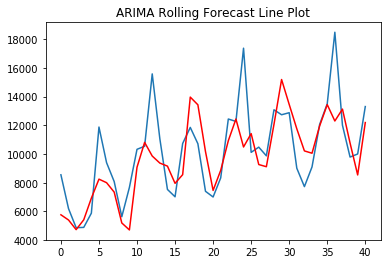

In [22]:

from pandas import Series
series =  pd.Series(df['Bookings'].values)

X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(4,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.title("ARIMA Rolling Forecast Line Plot")
plt.show()

A line plot is created showing the expected values (blue) compared to the rolling forecast predictions (red). We can see the values show some trend and are in the correct scale.

The model could use further tuning of the p, d, and maybe even the q parameters.



# Additional work

This work is from https://machinelearningmastery.com/grid-search-arima-hyperparameters-with-python/

##  1. How to tune the ARIMA model

Using a grid search of hyperparameters.
After completing this tutorial, you will know:

* A general procedure that you can use to tune the ARIMA hyperparameters for a rolling one-step forecast.
* How to apply ARIMA hyperparameter optimization on a standard univariate time series dataset.
* Ideas for extending the procedure for more elaborate and robust models.

### Grid Searching Method
Diagnostic plots of the time series can be used along with heuristic rules to determine the hyperparameters of the ARIMA model.

These are good in most, but perhaps not all, situations.

We can automate the process of training and evaluating ARIMA models on different combinations of model hyperparameters. In machine learning this is called a grid search or model tuning.

In this tutorial, we will develop a method to grid search ARIMA hyperparameters for a one-step rolling forecast.

The approach is broken down into two parts:

* Evaluate an ARIMA model.
* Evaluate sets of ARIMA parameters.

## 2. Evaluate ARIMA Model
We can evaluate an ARIMA model by preparing it on a training dataset and evaluating predictions on a test dataset.

This approach involves the following steps:

* Split the dataset into training and test sets.
* Walk the time steps in the test dataset.
    * Train an ARIMA model.
    * Make a one-step prediction.
    * Store prediction; get and store actual observation.
* Calculate error score for predictions compared to expected values.

We can implement this in Python as a new standalone function called evaluate_arima_model() that takes a time series dataset as input as well as a tuple with the p, d, and q parameters for the model to be evaluated.

The dataset is split in two: 66% for the initial training dataset and the remaining 34% for the test dataset.

Each time step of the test set is iterated. Just one iteration provides a model that you could use to make predictions on new data. The iterative approach allows a new ARIMA model to be trained each time step.

A prediction is made each iteration and stored in a list. This is so that at the end of the test set, all predictions can be compared to the list of expected values and an error score calculated. In this case, a mean squared error score is calculated and returned.

In [11]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error

## 3. Iterate ARIMA Parameters
Evaluating a suite of parameters is relatively straightforward.

The user must specify a grid of p, d, and q ARIMA parameters to iterate. A model is created for each parameter and its performance evaluated by calling the evaluate_arima_model() function described in the previous section.

The function must keep track of the lowest error score observed and the configuration that caused it. This can be summarized at the end of the function with a print to standard out.

We can implement this function called evaluate_models() as a series of four loops.

There are two additional considerations. The first is to ensure the input data are floating point values (as opposed to integers or strings), as this can cause the ARIMA procedure to fail.

Second, the statsmodels ARIMA procedure internally uses numerical optimization procedures to find a set of coefficients for the model. These procedures can fail, which in turn can throw an exception. We must catch these exceptions and skip those configurations that cause a problem. This happens more often then you would think.

Additionally, it is recommended that warnings be ignored for this code to avoid a lot of noise from running the procedure.

In [31]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [17]:
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)


ARIMA(0, 0, 0) MSE=50150795.704
ARIMA(0, 0, 1) MSE=25437828.994
ARIMA(0, 1, 0) MSE=9231237.342
ARIMA(0, 1, 1) MSE=10609045.307
ARIMA(0, 1, 2) MSE=7088084.671
ARIMA(0, 2, 0) MSE=20018173.243
ARIMA(0, 2, 1) MSE=9505151.360
ARIMA(1, 0, 0) MSE=9404797.555
ARIMA(1, 1, 0) MSE=9491550.789
ARIMA(1, 2, 0) MSE=15716470.721
ARIMA(2, 0, 0) MSE=9546121.957
ARIMA(2, 1, 0) MSE=9561499.786
ARIMA(2, 2, 0) MSE=16072596.394
ARIMA(4, 1, 0) MSE=5488528.732
ARIMA(4, 1, 1) MSE=5337372.538
ARIMA(4, 2, 0) MSE=10730925.646
ARIMA(6, 1, 0) MSE=5508828.087
Best ARIMA(4, 1, 1) MSE=5337372.538


## 4. Save an ARIMA Time Series Forecasting Model

The statsmodels library provides an implementation of ARIMA for use in Python. ARIMA models can be saved to file for later use in making predictions on new data. There is a bug in the earlier versions to 0.9 of the statsmodels library that prevents saved models from being loaded.


In [32]:
import statsmodels
print('statsmodels: %s' % statsmodels.__version__)

statsmodels: 0.9.0


In [34]:
from statsmodels.tsa.arima_model import ARIMAResults

# save model
model_fit.save('model.pkl')
# load model
loaded = ARIMAResults.load('model.pkl')